AMAZON PRIME MOVIES AND TV SHOWS (Dataset sourced from kaggle.com)

In [461]:
# This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

# This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

# id: The title ID on JustWatch.
# title: The name of the title.
# show_type: TV show or movie.
# description: A brief description.
# release_year: The release year.
# age_certification: The age certification.
# runtime: The length of the episode (SHOW) or movie.
# genres: A list of genres.
# production_countries: A list of countries that produced the title.
# seasons: Number of seasons if it's a SHOW.
# imdb_id: The title ID on IMDB.
# imdb_score: Score on IMDB.
# imdb_votes: Votes on IMDB.
# tmdb_popularity: Popularity on TMDB.
# tmdb_score: Score on TMDB.


# And over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

# person_ID: The person ID on JustWatch.
# id: The title ID on JustWatch.
# name: The actor or director's name.
# character_name: The character name.
# role: ACTOR or DIRECTOR.

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [463]:
df_title = pd.read_csv('titles.csv')
df_credits = pd.read_csv('credits.csv')

INSPECT DATA: df_title

In [464]:
df_title

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,tt21946058,5.8,1269.0,4.403,4.300
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,tt23805304,5.6,812.0,3.406,8.000
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,tt26548127,8.3,10.0,1.960,NaN
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN


In [465]:
# Shape of the dataframe: df_title

print('title.csv: ' + str(df_title.shape))

title.csv: (10873, 15)


In [466]:
# Check null data in the dataframe

df_title.isnull().sum()

id                         0
title                      0
type                       0
description              144
release_year               0
age_certification       7185
runtime                    0
genres                     0
production_countries       0
seasons                 9322
imdb_id                  701
imdb_score              1108
imdb_votes              1120
tmdb_popularity          571
tmdb_score              2126
dtype: int64

In [467]:
# Check datatypes of each columns

df_title.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [468]:
# Checking production_countries column

df_title['production_countries'].unique()

array(["['US']", "['GB']", "['SU']", "['DE', 'GB']", "['DE', 'US']",
       "['MX']", "['CA', 'US']", "['US', 'CA']", "['IN']", '[]', "['SE']",
       "['IT', 'US']", "['GB', 'US', 'PA', 'ES']", "['MA', 'GB']",
       "['IT', 'FR']", "['HK']", "['FR', 'DE', 'IT']",
       "['US', 'FR', 'DE']", "['DE']", "['GB', 'US']", "['CA']",
       "['IT', 'US', 'ES']", "['JP']", "['IT', 'GB', 'US']",
       "['CA', 'GB']", "['IT', 'ES']", "['DE', 'IT']", "['IT']",
       "['US', 'NL']", "['US', 'GB']", "['PR', 'US']", "['US', 'MX']",
       "['FR']", "['US', 'DE']", "['CA', 'FR']", "['ES']", "['US', 'PR']",
       "['FR', 'IT']", "['ES', 'IT']", "['IE', 'US']", "['PH', 'US']",
       "['CH', 'DE']", "['RO']", "['US', 'FR']", "['YU', 'XC']",
       "['US', 'SU']", "['JP', 'US']", "['FR', 'US']",
       "['ES', 'GB', 'US']", "['DE', 'LI', 'IT', 'ES']", "['KR', 'US']",
       "['MX', 'IT']", "['GB', 'FR']", "['DE', 'IT', 'FR']",
       "['KR', 'JP']", "['YU', 'US']", "['US', 'IT']", "['IT', 'CA']",
 

INSPECT DATA: df_credits

In [469]:
df_credits

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...
140548,2616047,tm1307408,Barri Tsavaris,Jeni / Poki / Jojo / Chumli,ACTOR
140549,2030678,tm1307408,Park Yerin,Frido / Tani,ACTOR
140550,1378851,tm1307408,Bommie Han,Pinkfong / Rachel / Jordi,ACTOR
140551,2762736,tm1307408,Sharon Youngmee,Billi / Baker,ACTOR


In [470]:
# Shape of the dataframe: df_credits

print('credits.csv: ' +  str(df_credits.shape))

credits.csv: (140553, 5)


In [471]:
# Check null data in the dataframe

df_credits.isnull().sum()

person_id        0
id               0
name             0
character    17848
role             0
dtype: int64

In [472]:
# Checking the null values of the characters: NO CHANGES to apply for now

df_credits[df_credits['character'].isnull()]

,person_id,id,name,character,role
115,20177,tm87233,Frank Capra,NaN,DIRECTOR
150,60962,tm143047,Leo McCarey,NaN,DIRECTOR
186,23839,tm83884,Howard Hawks,NaN,DIRECTOR
227,23839,tm5012,Howard Hawks,NaN,DIRECTOR
259,13717,tm82253,William Wyler,NaN,DIRECTOR
...,...,...,...,...,...
140536,139404,tm1284753,Siddique,NaN,ACTOR
140537,731934,tm1284753,Gayatri Arun,NaN,ACTOR
140540,1858509,tm1284753,Sagar Surya,NaN,ACTOR
140543,256709,tm1284753,Bash Mohammed,NaN,DIRECTOR


In [473]:
# Check datatypes of each columns : Looks GOOD

df_credits.dtypes

person_id     int64
id           object
name         object
character    object
role         object
dtype: object

In [474]:
df_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [475]:
# Inspect person_id column : There are multiple persons listed repeatedly -- OK

df_credits['person_id'].value_counts().sort_values(ascending=False)

100231     53
123795     48
151608     45
14166      45
64203      41
           ..
2679908     1
793881      1
1358970     1
1032364     1
2724813     1
Name: person_id, Length: 92462, dtype: int64

In [476]:
# Example: For ACTOR with person_id of 100231, he worked for multiple movies/shows ~ No further action required on this dataframe column

df_credits[df_credits['person_id'] == 100231].head(10)

,person_id,id,name,character,role
1164,100231,tm164354,George 'Gabby' Hayes,Sheriff Ed Williams,ACTOR
1614,100231,tm165975,George 'Gabby' Hayes,George Hale,ACTOR
2518,100231,tm97056,George 'Gabby' Hayes,Cactus,ACTOR
2760,100231,tm99829,George 'Gabby' Hayes,'Dusty',ACTOR
3222,100231,tm138333,George 'Gabby' Hayes,Timothy Shine,ACTOR
3560,100231,tm132612,George 'Gabby' Hayes,Charlie Denton,ACTOR
3658,100231,tm71829,George 'Gabby' Hayes,Gabby,ACTOR
4237,100231,tm143579,George 'Gabby' Hayes,Detective Casey,ACTOR
4467,100231,tm101797,George 'Gabby' Hayes,Sheriff Jake Withers,ACTOR
4639,100231,tm105780,George 'Gabby' Hayes,Matt Matlock,ACTOR


DATA PREPARATION : df_title

In [477]:
# For guidance, check columns

df_title.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [478]:
# NO COLUMNS TO DROP

# Example of dropping some columns:

# df_title = df_title[['id', 'title', 'type', 'description', 'release_year',
#        'age_certification', 
#        'runtime', 
#        'genres', 'production_countries',
#        'seasons'
#        # , 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity','tmdb_score'
#        ]]

In [479]:
# Renaming Columns:

df_title = df_title.rename(columns = {'id' : 'Id', 
                           'title' : 'Title', 
                           'type' : 'Type', 
                           'description' : 'Description', 
                           'release_year' : 'Release_Year',
                           'age_certification' : 'Age_Certification', 
                           'runtime' : 'Runtime', 
                           'genres' : 'Genres', 
                           'production_countries' : 'Production_Countries',
                           'seasons' : 'Seasons',
                           'imdb_id' : 'IMDB_Id', 
                           'imdb_score' : 'IMDB_Score', 
                           'imdb_votes' : 'IMDB_Votes', 
                           'tmdb_popularity' : 'TMDB_Popularity', 
                           'tmdb_score' : 'TMDB_Score'
                           }
                )

In [480]:
df_title

,Id,Title,Type,Description,Release_Year,Age_Certification,Runtime,Genres,Production_Countries,Seasons,IMDB_Id,IMDB_Score,IMDB_Votes,TMDB_Popularity,TMDB_Score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,tt21946058,5.8,1269.0,4.403,4.300
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,tt23805304,5.6,812.0,3.406,8.000
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,tt26548127,8.3,10.0,1.960,NaN
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN


In [481]:
#Inspect Columns: genres

df_title['Genres'].unique()


array(["['drama', 'family', 'fantasy', 'romance', 'comedy']",
       "['comedy', 'war']", "['drama', 'romance', 'comedy']", ...,
       "['scifi', 'drama', 'fantasy', 'horror']",
       "['comedy', 'drama', 'action', 'romance']",
       "['drama', 'thriller', 'romance', 'music']"], dtype=object)

In [482]:
# Refine Production Countries column

df_title['Production_Countries'] = df_title['Production_Countries'].str.replace("'", "")
df_title['Production_Countries'] = df_title['Production_Countries'].str.replace("[", "")
df_title['Production_Countries'] = df_title['Production_Countries'].str.replace("]", "")

df_title['Production_Countries']

C:\Users\jervis\AppData\Local\Temp\ipykernel_6852\2991825393.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_title['Production_Countries'] = df_title['Production_Countries'].str.replace("[", "")
C:\Users\jervis\AppData\Local\Temp\ipykernel_6852\2991825393.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_title['Production_Countries'] = df_title['Production_Countries'].str.replace("]", "")


0        US
1        US
2        US
3        US
4        US
         ..
10868    IN
10869    IN
10870      
10871      
10872      
Name: Production_Countries, Length: 10873, dtype: object

In [485]:
df_title['Production_Countries'].nunique()

569

DATA PREPARATION : df_credits

In [486]:
df_credits

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...
140548,2616047,tm1307408,Barri Tsavaris,Jeni / Poki / Jojo / Chumli,ACTOR
140549,2030678,tm1307408,Park Yerin,Frido / Tani,ACTOR
140550,1378851,tm1307408,Bommie Han,Pinkfong / Rachel / Jordi,ACTOR
140551,2762736,tm1307408,Sharon Youngmee,Billi / Baker,ACTOR


In [487]:
df_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [488]:
# Renaming Columns:

df_credits = df_credits.rename(columns = {'person_id' : 'Person_Id', 
                                        'id' : 'Id', 
                                        'name' : 'Name', 
                                        'character' : 'Character', 
                                        'role' : 'Role'
                                            }
                                )

In [489]:
df_credits

,Person_Id,Id,Name,Character,Role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...
140548,2616047,tm1307408,Barri Tsavaris,Jeni / Poki / Jojo / Chumli,ACTOR
140549,2030678,tm1307408,Park Yerin,Frido / Tani,ACTOR
140550,1378851,tm1307408,Bommie Han,Pinkfong / Rachel / Jordi,ACTOR
140551,2762736,tm1307408,Sharon Youngmee,Billi / Baker,ACTOR


In [490]:
# Check duplicates if there are any : No duplicates

df_credits.duplicated().sum()

0

FEATURE UNDERSTANDING

In [491]:
# Number of years shown in the dataframe
df_title['Release_Year'].nunique()

112

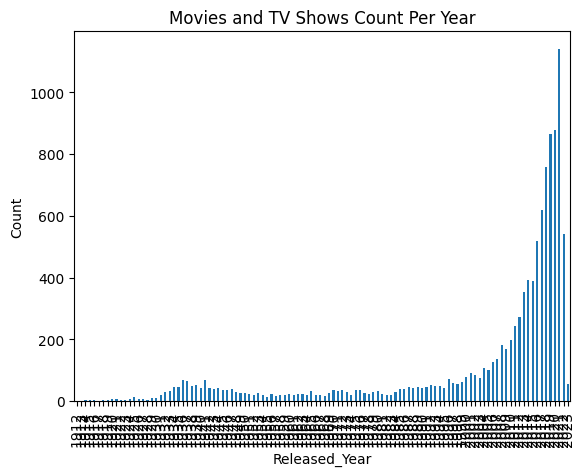

In [492]:
# Feature Check: Shows released per Year

ax = df_title['Release_Year'].value_counts().sort_index() \
                        .head(112) \
                        .plot(kind='bar', title='Movies and TV Shows Count Per Year')
ax.set_xlabel('Released_Year')
ax.set_ylabel('Count')

plt.show()

Text(0, 0.5, 'Count')

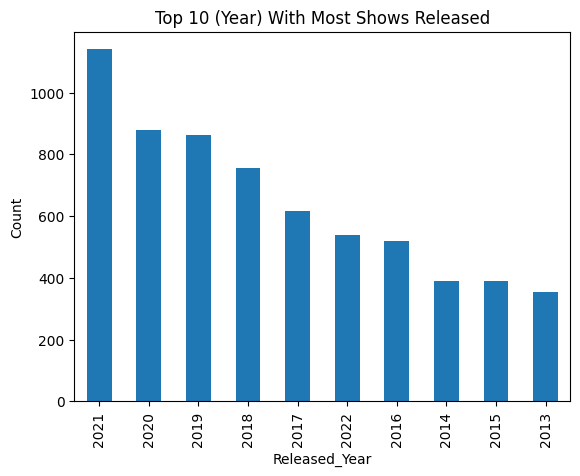

In [493]:
# Top 10 with most released shows in a year

ax = df_title['Release_Year'].value_counts() \
                        .head(10) \
                        .plot(kind='bar', title='Top 10 (Year) With Most Shows Released')

ax.set_xlabel('Released_Year')
ax.set_ylabel('Count')

Text(0.5, 0, 'Score')

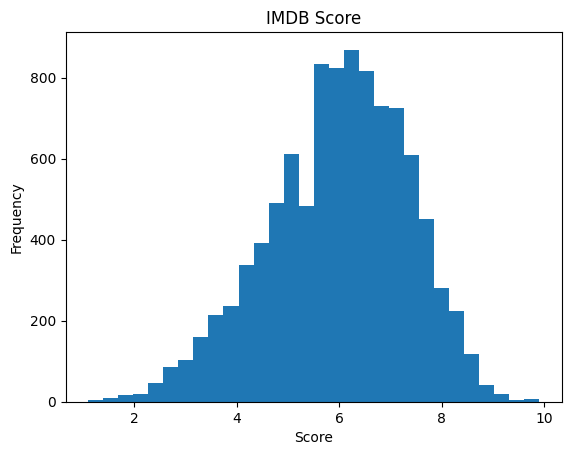

In [494]:
ax = df_title['IMDB_Score'].plot(kind='hist', 
                                bins=30, 
                                title='IMDB Score')
ax.set_xlabel('Score')

Text(0.5, 0, 'Score')

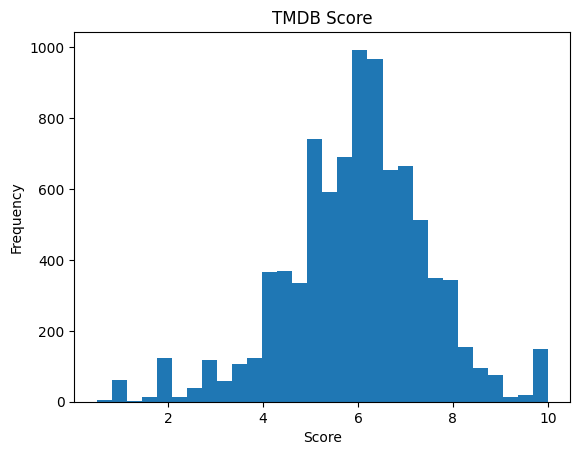

In [495]:
ax = df_title['TMDB_Score'].plot(kind='hist', 
                                bins=30, 
                                title='TMDB Score')
ax.set_xlabel('Score')

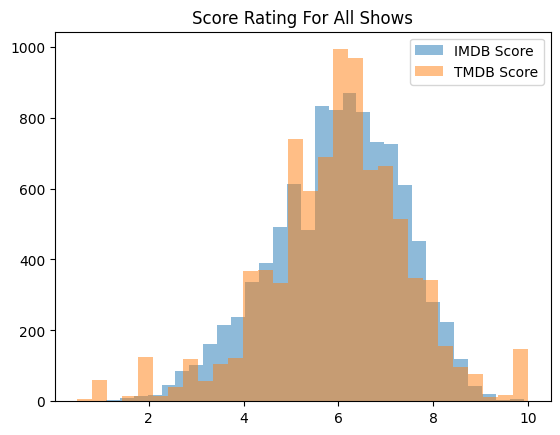

In [496]:
plt.hist(df_title['IMDB_Score'], bins = 30, alpha = 0.5, label = 'IMDB Score')
plt.hist(df_title['TMDB_Score'], bins = 30, alpha = 0.5, label = 'TMDB Score')
plt.title('Score Rating For All Shows')

plt.legend()
plt.show()

<Axes: xlabel='IMDB_Score', ylabel='TMDB_Score'>

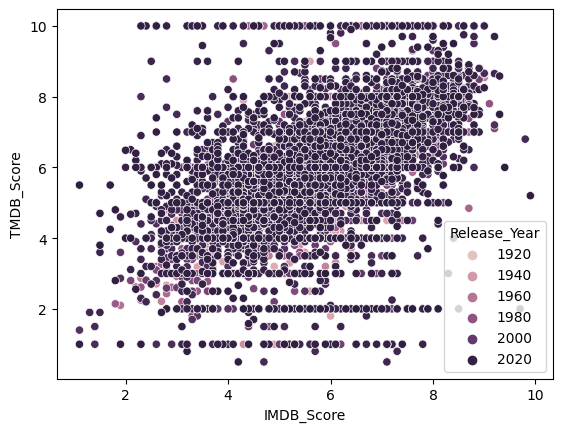

In [497]:
sns.scatterplot(x='IMDB_Score', 
                y='TMDB_Score', 
                data = df_title,
                hue = 'Release_Year')

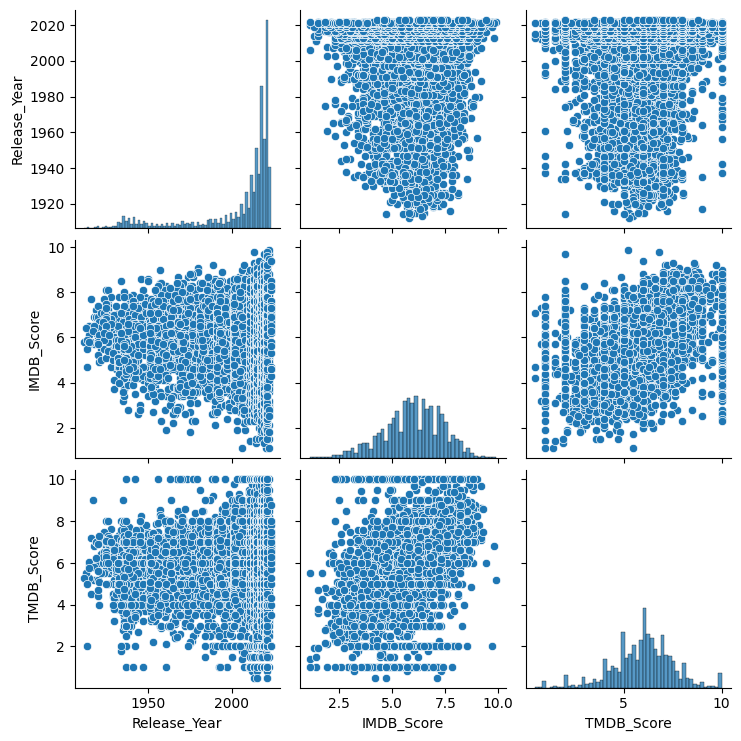

In [498]:
sns.pairplot(data = df_title, vars = ['Release_Year', 'IMDB_Score', 'TMDB_Score'])

EXPLORATORY DATA ANALYSIS

In [499]:
# Remove unnecessary characters from Genres column
df_title['Genres'] = df_title['Genres'].str.replace("'", "")
df_title['Genres'] = df_title['Genres'].str.replace("[", "")
df_title['Genres'] = df_title['Genres'].str.replace("]", "")
df_title['Genres'] = df_title['Genres'].str.replace(" ", "")

df_title['Genres']

C:\Users\jervis\AppData\Local\Temp\ipykernel_6852\928669420.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_title['Genres'] = df_title['Genres'].str.replace("[", "")
C:\Users\jervis\AppData\Local\Temp\ipykernel_6852\928669420.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_title['Genres'] = df_title['Genres'].str.replace("]", "")


0        drama,family,fantasy,romance,comedy
1                                 comedy,war
2                       drama,romance,comedy
3                              comedy,family
4               western,drama,romance,action
                        ...                 
10868                  action,thriller,crime
10869                           drama,comedy
10870                                 comedy
10871                                       
10872                                  drama
Name: Genres, Length: 10873, dtype: object

In [500]:
# Identify the unique genre mentioned in the dataset.

genre = []
for gen in df_title['Genres'].values:
    genre += gen.split(",")
    genre = list(dict.fromkeys(genre))
print(genre)
print(len(genre))

['drama', 'family', 'fantasy', 'romance', 'comedy', 'war', 'western', 'action', 'european', 'animation', 'scifi', 'horror', 'thriller', 'crime', 'sport', 'history', 'music', 'documentation', '', 'reality']
20


In [501]:
freq = []
for gen in genre:
    counter = 0
    for temp in df_title['Genres']:
        if gen in temp.split(','):
            counter += 1
    freq.append([gen, counter])

df_freq = pd.DataFrame(freq, columns = ['Genre_Type', 'Frequency'])
df_freq.sort_values('Frequency', ascending = True, inplace = True)
df_freq.reset_index(drop=True, inplace=True)
df_freq

,Genre_Type,Frequency
0,reality,152
1,,199
2,sport,276
3,war,332
4,western,453
5,history,464
6,music,505
7,animation,550
8,fantasy,632
9,european,757


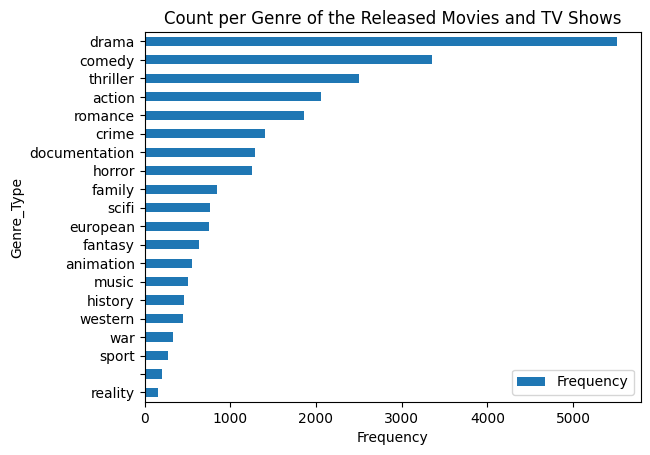

In [502]:
ax = df_freq.plot(x='Genre_Type', y='Frequency', kind='barh', title = 'Count per Genre of the Released Movies and TV Shows')

ax.set_xlabel('Frequency')
plt.show()

In [503]:
# Explore data:
# - what genre that is highly rated?
# - year with most drama shows released
# - year with most drama shows released with atleast 9 IMDB and TMDB score
# - actor with most released shows (top 5)
# - actor with mostly drama genre shows released
# - top director for highly rated shows (atleast 9.5?)

Text(0, 0.5, 'Count')

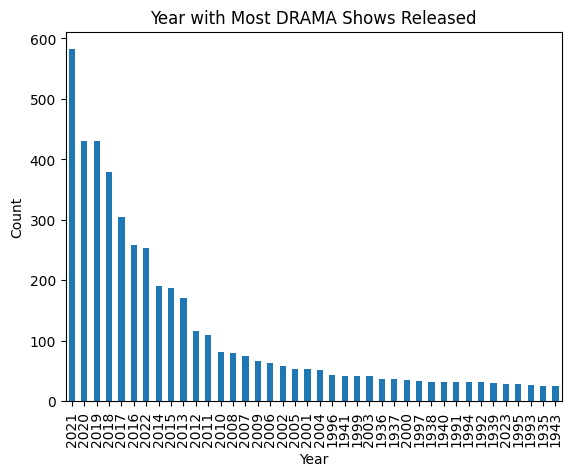

In [504]:
# Year with most drama shows released
ax = df_title[df_title['Genres'].str.contains('drama')]['Release_Year'].value_counts() \
    .sort_values(ascending=False) \
    .head(40) \
    .plot(kind='bar', title='Year with Most DRAMA Shows Released')

ax.set_xlabel('Year')
ax.set_ylabel('Count')

In [505]:
df_title.dtypes

Id                       object
Title                    object
Type                     object
Description              object
Release_Year              int64
Age_Certification        object
Runtime                   int64
Genres                   object
Production_Countries     object
Seasons                 float64
IMDB_Id                  object
IMDB_Score              float64
IMDB_Votes              float64
TMDB_Popularity         float64
TMDB_Score              float64
dtype: object

Text(0, 0.5, 'Count')

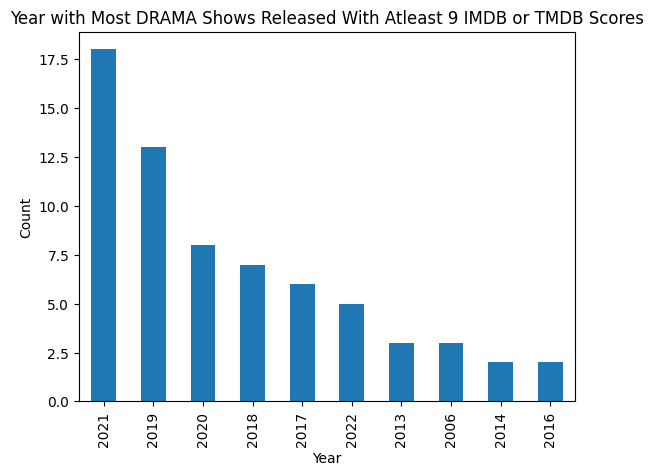

In [506]:
# Year with most drama shows released with atleast 9 IMDB or TMDB score
df_dramahigh = df_title[(df_title['Genres'].str.contains('drama')) & ((df_title['IMDB_Score'] >= 9.0) | (df_title['TMDB_Score'] >= 9.0))]

ax = df_dramahigh['Release_Year'].value_counts() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar', title='Year with Most DRAMA Shows Released With Atleast 9 IMDB or TMDB Scores')

ax.set_xlabel('Year')
ax.set_ylabel('Count')

In [507]:
# Actor with most released shows (top 5)
    # Merge two dataframes (df_title and df_credits)

df_all = df_title.merge(df_credits, on= 'Id', how ='right')
df_all.head(5)

,Id,Title,Type,Description,Release_Year,Age_Certification,Runtime,Genres,Production_Countries,Seasons,IMDB_Id,IMDB_Score,IMDB_Votes,TMDB_Popularity,TMDB_Score,Person_Id,Name,Character,Role
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama,family,fantasy,romance,comedy",US,NaN,tt0038650,8.6,467766.0,27.611,8.261,25020,James Stewart,George Bailey,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama,family,fantasy,romance,comedy",US,NaN,tt0038650,8.6,467766.0,27.611,8.261,26190,Donna Reed,Mary Hatch,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama,family,fantasy,romance,comedy",US,NaN,tt0038650,8.6,467766.0,27.611,8.261,25653,Lionel Barrymore,Mr. Potter,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama,family,fantasy,romance,comedy",US,NaN,tt0038650,8.6,467766.0,27.611,8.261,13301,Thomas Mitchell,Uncle Billy,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama,family,fantasy,romance,comedy",US,NaN,tt0038650,8.6,467766.0,27.611,8.261,34171,Henry Travers,Clarence,ACTOR


In [508]:
df_credits['Name'].nunique()

91492

In [509]:
# Top 5 Actors with most released shows:

df_all['Name'].value_counts().head(5)

George 'Gabby' Hayes    53
Roy Rogers              48
Joseph Kane             45
Bess Flowers            45
Prakash Raj             41
Name: Name, dtype: int64

In [510]:
# Actor with mostly drama genre shows released (Show Top 5)
df_all[df_all['Genres'].str.contains('drama')]['Name'].value_counts().head(5)

Prakash Raj     32
Nassar          31
Bess Flowers    25
Sam Newfield    24
Herman Hack     23
Name: Name, dtype: int64

In [511]:
# Top director for highly rated shows (high average)

# Add column that shows the average score from IMDB_Score and TMDB_Score : 'Score_Ave'
df_all['Score_Ave'] = (df_all['IMDB_Score'] + df_all['TMDB_Score']) / 2


df_all[df_all['Role'] == 'DIRECTOR'].groupby('Name')['Score_Ave'].mean().sort_values(ascending=False)


Name
Michelle Memran             9.40
Shailesh Baliram Narwade    9.15
Patrick Russell             9.10
Paul Dugdale                9.00
Mat Hames                   9.00
                            ... 
彭緯宸                          NaN
鄧科                           NaN
김은미                          NaN
신유선                          NaN
존스 와콘 마                      NaN
Name: Score_Ave, Length: 7153, dtype: float64

In [512]:
# Checking 'Michelle Memran'

df_all[df_all['Name'].str.contains('Michelle Memran')]

,Id,Title,Type,Description,Release_Year,Age_Certification,Runtime,Genres,Production_Countries,Seasons,IMDB_Id,IMDB_Score,IMDB_Votes,TMDB_Popularity,TMDB_Score,Person_Id,Name,Character,Role,Score_Ave
90630,tm429793,The Rest I Make Up,MOVIE,Maria Irene Fornes is “America's Great Unknown...,2018,NaN,79,documentation,US,NaN,tt5495230,8.8,65.0,0.635,10.0,2392889,Michelle Memran,NaN,DIRECTOR,9.4


In [513]:
# Top 10 director with atleast 10 shows released having highly rated shows (high average)

df_DirHigh = df_all[df_all['Role'] == 'DIRECTOR'].groupby('Name')['Score_Ave'].agg(['count', np.mean])
df_DirHigh = df_DirHigh.sort_values(by='count', ascending=False)
df_DirHighTop10 = df_DirHigh[df_DirHigh['count'] >= 10].sort_values(by='mean', ascending=False).head(10)
df_DirHighTop10

,count,mean
Name,,
William Wyler,10,7.331900
Manny Rodriguez,12,7.099167
Yash Chopra,10,6.986100
Jay Chapman,31,6.470968
Brian Volk-Weiss,14,6.075000
Lesley Selander,11,5.825273
Joseph Kane,38,5.725382
William Nigh,18,5.562139
Frank McDonald,10,5.504150


In [514]:
# Checking 'William Wyler'

df_all[df_all['Name'] == 'William Wyler']

,Id,Title,Type,Description,Release_Year,Age_Certification,Runtime,Genres,Production_Countries,Seasons,IMDB_Id,IMDB_Score,IMDB_Votes,TMDB_Popularity,TMDB_Score,Person_Id,Name,Character,Role,Score_Ave
259,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1947,NaN,171,"drama,romance,war",US,NaN,tt0038351,8.1,66209.0,16.056,7.838,13717,William Wyler,NaN,DIRECTOR,7.9690
313,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,NaN,115,"drama,romance",US,NaN,tt0033836,7.9,12337.0,7.215,7.549,13717,William Wyler,NaN,DIRECTOR,7.7245
563,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,NaN,101,"drama,romance",US,NaN,tt0027532,7.8,9556.0,7.516,7.195,13717,William Wyler,Violin Player in Dance Orchestra (Uncredited),ACTOR,7.4975
576,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,NaN,101,"drama,romance",US,NaN,tt0027532,7.8,9556.0,7.516,7.195,13717,William Wyler,NaN,DIRECTOR,7.4975
666,tm155610,Wuthering Heights,MOVIE,The Earnshaws are Yorkshire farmers during the...,1939,NaN,104,"romance,drama",US,NaN,tt0032145,7.5,18734.0,15.933,7.227,13717,William Wyler,NaN,DIRECTOR,7.3635
839,tm113731,Come and Get It,MOVIE,An ambitious lumberjack abandons his saloon gi...,1936,NaN,99,"drama,romance",US,NaN,tt0027459,6.9,2178.0,2.779,6.729,13717,William Wyler,NaN,DIRECTOR,6.8145
1947,tm71517,Dead End,MOVIE,"Mobster ""Baby Face"" Martin returns home to vis...",1938,NaN,93,"drama,romance,crime",US,NaN,tt0177600,7.2,8024.0,7.515,7.100,13717,William Wyler,NaN,DIRECTOR,7.1500
2757,tm3083,The Memphis Belle: A Story of a Flying Fortress,MOVIE,This WW2 documentary centers on the crew of th...,1944,NaN,45,"documentation,history,war",US,NaN,tt0036152,7.3,1749.0,5.397,6.700,13717,William Wyler,NaN,DIRECTOR,7.0000
4043,tm75776,The Westerner,MOVIE,Drifter Cole Harden is accused of stealing a h...,1940,NaN,100,"action,western,romance,drama,comedy",US,NaN,tt0181543,7.3,6335.0,8.090,7.000,13717,William Wyler,NaN,DIRECTOR,7.1500
5901,tm113262,These Three,MOVIE,Martha and Karen graduate from college and tur...,1936,NaN,93,"drama,music,romance",US,NaN,tt0028356,7.4,2850.0,3.714,7.300,13717,William Wyler,NaN,DIRECTOR,7.3500
